Model Report
Best Score: 0.838713 based on {'subsample': 0.4, 'n_estimators': 300, 'learning_rate': 0.01}
mean: 0.83212, std: 0.03811, params: {'subsample': 0.7, 'n_estimators': 700, 'learning_rate': 0.001}
mean: 0.83719, std: 0.03481, params: {'subsample': 0.2, 'n_estimators': 300, 'learning_rate': 0.01}
mean: 0.83871, std: 0.03651, params: {'subsample': 0.4, 'n_estimators': 300, 'learning_rate': 0.01}
mean: 0.82637, std: 0.03577, params: {'subsample': 0.4, 'n_estimators': 400, 'learning_rate': 0.0001}
mean: 0.83381, std: 0.04192, params: {'subsample': 1.0, 'n_estimators': 500, 'learning_rate': 0.01}
mean: 0.80644, std: 0.03084, params: {'subsample': 1.0, 'n_estimators': 400, 'learning_rate': 0.1}
mean: 0.83224, std: 0.03932, params: {'subsample': 0.8, 'n_estimators': 100, 'learning_rate': 0.01}
mean: 0.83146, std: 0.03897, params: {'subsample': 0.4, 'n_estimators': 100, 'learning_rate': 0.01}
mean: 0.82861, std: 0.03880, params: {'subsample': 0.3, 'n_estimators': 500, 'learning_rate'

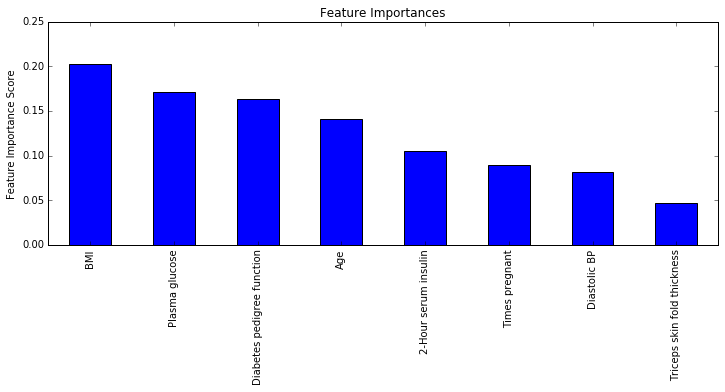

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  
from xgboost import XGBClassifier
from sklearn import cross_validation, metrics   
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import RandomizedSearchCV  


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
features = ["Times pregnant", "Plasma glucose", "Diastolic BP", "Triceps skin fold thickness", "2-Hour serum insulin", "BMI", "Diabetes pedigree function", "Age"]

# load data
dataset = pd.read_csv(url, header = None)
dataset.head()

dataset = dataset.values
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]

#Instantiate the model
model = XGBClassifier()

#Parameter Tuning
learning_rate = [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1]
n_estimators = [100, 200, 300, 400, 500, 600, 700]
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample)
kfold = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=7)
rand_search = RandomizedSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
result = rand_search.fit(X, y)

print("Model Report")
print("Best Score: %f based on %s" % (result.best_score_, result.best_params_))

#print(result.grid_scores_)

#print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(result.grid_scores_),np.std(result.grid_scores_),np.min(result.grid_scores_),np.max(result.grid_scores_)))
        
for mean in result.grid_scores_:
    print(mean)


#Plot Feature Importance
model.fit(X,y)
feat_imp = pd.Series(model.feature_importances_, features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

#Note: Stochastic Gradient Boosting using subsampling parameter and early stopping rounds(in model.fit) are useful for regularizing XGBoost models
#Keep validation data to try out on the tuned parameters